## Libraries and directories

In [155]:
from plotly.graph_objs import *
import plotly.plotly as py
import plotly.tools as tls
import numpy as np
import pandas as pd
import os

#msbayes paths
MSBAYES_ROOTDIR="/Volumes/WorkDrive/msbayes-buffering/hickerlab-repository/msbayes-buffering/"
MSBAYES_EXECDIR=MSBAYES_ROOTDIR+"src/"

# Binaries
MSBAYES_BIN=MSBAYES_EXECDIR+"msbayes.pl"
MSCONVERT_PL=MSBAYES_EXECDIR+"convertIM.pl"
MSOBSSS_PL=MSBAYES_EXECDIR+"obsSumStats.pl"
MSREJECT_PL=MSBAYES_EXECDIR+"acceptRej.pl"

# Results directories
MSBAYES_DATADIR=MSBAYES_ROOTDIR+"data/"

# Specific paths for the butterfly data
BFLY_OUT=MSBAYES_DATADIR+"bfly/"
BFLY_CONF_DIR=BFLY_OUT+"conf/"
BFLY_PRIORS=BFLY_OUT+"priors/"
BFLY_RESULTS=BFLY_OUT+"results/"
BFLY_IMFILES_DIR="/Volumes/WorkDrive/msbayes-buffering/bfly-im-files/"

## PATHS and files for the full dataset
BFLY_FULL_CONF_DIR=BFLY_CONF_DIR+"full/"
BFLY_FULL_INFILE=BFLY_FULL_CONF_DIR+"bfly-full-infile.txt"
BFLY_FULL_CONF=BFLY_FULL_CONF_DIR+"conf_bfly_full_buffer0.txt"
BFLY_FULL_PRIORS_DIR=BFLY_PRIORS+"full/"
BFLY_FULL_RESULTS_DIR=BFLY_RESULTS+"full/"

BFLY_OBS_SS=BFLY_FULL_CONF_DIR+"bfly_full_obsSS.txt"

## PATHS and files for the subset of data with a larger number of 
## samples per taxon pair
BFLY_SUBSET_CONF_DIR=BFLY_CONF_DIR+"subset/"
## Don't use this one, iterating over different values of maxn to keep
#BFLY_SUBSET_INFILE=BFLY_SUBSET_CONF_DIR+"bfly-subset-infile.txt"
BFLY_SUBSET_CONF=BFLY_SUBSET_CONF_DIR+"butterfly.subset.conf"
BFLY_SUBSET_PRIORS_DIR=BFLY_PRIORS+"subset/"
BFLY_SUBSET_RESULTS_DIR=BFLY_RESULTS+"subset/"

os.chdir(MSBAYES_EXECDIR)

## Post-flight for full dataset

In [162]:
BFLY_RESULTS_DIR = BFLY_FULL_RESULTS_DIR
FLY_OBS_SS = BFLY_FULL_CONF_DIR+"bfly_full_obsSS.txt"

## For subset only
BFLY_RESULTS_DIR = BFLY_SUBSET_RESULTS_DIR
BFLY_OBS_SS = BFLY_SUBSET_CONF_DIR+"maxn-5-bfly-subset-obsSS.txt"

###########################################################

# Make the conf files for different buffer values
BUFFER_VALUES = ["0", "0.1", "0.05", "0.01"]

## Read in the observed
observed_file = BFLY_OBS_SS
df_obs = pd.read_csv(observed_file, header=0, sep="\t")
#print(df_obs)
obs_x=df_obs.ix[:,4:120].values
#print(len(obs_x[0]))

#for buff in BUFFER_VALUES:
for buff in ["0.01"]:
    posterior_file = BFLY_RESULTS_DIR + "buffer" + buff + "/"\
                    + "posterior_table.buffer" + buff + ".txt"
    df = pd.read_csv(posterior_file, header=0, sep=" ")
    print(df.tail(1))
    print(len(df))

      Pos.wo.LCR.Psi  Pos.LLR.var.t  Pos.wo.LLR.var.t  Pos.LLR.E.t  \
1019               3        0.07906          0.044342     0.306981   

      Pos.wo.LLR.E.t  Pos.LLR.omega  Pos.wo.LLR.omega      pi.1      pi.2  \
1019        0.287909       0.220578          0.154013  0.005494  0.018856   

          pi.3  wattTheta.1  wattTheta.2  wattTheta.3  pi.net.1  pi.net.2  \
1019  0.019786     0.005249     0.015282     0.021031  0.002686  0.024925   

      pi.net.3  tajD.denom.1  tajD.denom.2  tajD.denom.3  
1019   0.02891      0.015918      0.029163      0.044969  
1020


In [172]:
## Split the data into summary stats and data
y = df.ix[:,0:6].values
x = df.ix[:,7:].values

## Add the observed as the last element
print(len(x[0]))
x = np.vstack([x, obs_x])
print(len(x))

12


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
X_std = StandardScaler().fit_transform(x)
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [150]:
## Do pca on the untransformed data
Y_sklearn = sklearn_pca.fit_transform(x)

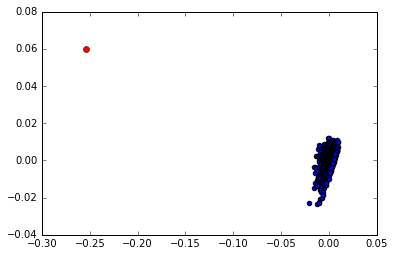

In [154]:
ptx, pty = zip(*Y_sklearn)
plt.scatter(ptx[:-1], pty[:-1])
plt.plot(ptx[-1], pty[-1], "ro")

In [168]:
print(df_obs)
print(obs_x)
print(len(obs_x[0]))


   PRI.Psi  PRI.var.t  PRI.E.t  PRI.omega    pi.b.1    pi.b.2   pi.b.3  \
0        1          0        1          0  0.002532  0.030893  0.03938   

     pi.w.1    pi.w.2    pi.w.3     ...          S_y.1     S_y.2     S_y.3  \
0  0.001255  0.006071  0.006545     ...       0.000613  0.002271  0.019554   

    S_xy.1    S_xy.2    S_xy.3  JWakeley_Psi.1  JWakeley_Psi.2  \
0  0.00067  0.003166  0.007408        0.494477        0.416756   

   JWakeley_Psi.3  Unnamed: 67  
0        2.069774          NaN  

[1 rows x 68 columns]
[[  2.53200000e-03   3.08930000e-02   3.93800000e-02   1.25500000e-03
    6.07100000e-03   6.54500000e-03   1.95100000e-03   1.91640000e-02
    1.71250000e-02   2.18700000e-03   1.35190000e-02   2.52370000e-02
    1.27700000e-03   2.48220000e-02   3.28360000e-02  -4.43345000e-01
    1.84872500e+00  -1.16779700e+00   1.02610000e-02   2.74080000e-02
    4.93350000e-02   1.27700000e-03   3.53800000e-03   6.71100000e-03
    1.23300000e-03   1.08000000e-02   3.32200000e-03

In [181]:
df_obs[['pi.1', 'pi.2', 'pi.3', 'wattTheta.1', 'wattTheta.2', 'wattTheta.3', 'pi.net.1',\
        'pi.net.2', 'pi.net.3', 'tajD.denom.1', 'tajD.denom.2', 'tajD.denom.3']]
type(obs_x)

numpy.ndarray

## Postflight Subset only

Doing buffer - 0
Doing buffer - 0.1
Doing buffer - 0.05
Doing buffer - 0.01


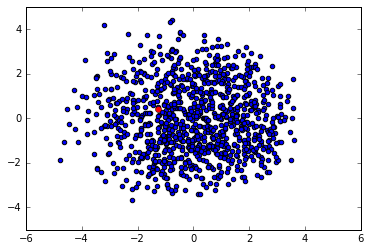

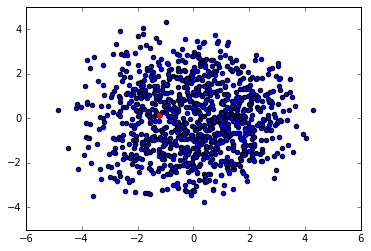

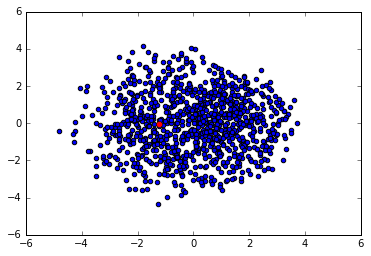

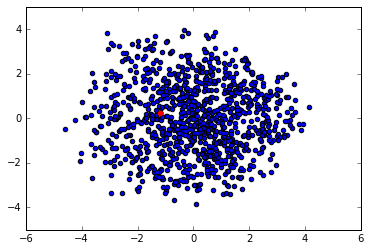

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

## For subset only
BFLY_RESULTS_DIR = BFLY_SUBSET_RESULTS_DIR
BFLY_OBS_SS = BFLY_SUBSET_CONF_DIR+"maxn-5-bfly-subset-obsSS.txt"

###########################################################

# Make the conf files for different buffer values
BUFFER_VALUES = ["0", "0.1", "0.05", "0.01"]

## Read in the observed
observed_file = BFLY_OBS_SS
df_obs = pd.read_csv(observed_file, header=0, sep="\t")
obs_x = df_obs[['pi.1', 'pi.2', 'pi.3', 'wattTheta.1', 'wattTheta.2', 'wattTheta.3', 'pi.net.1',\
        'pi.net.2', 'pi.net.3', 'tajD.denom.1', 'tajD.denom.2', 'tajD.denom.3']]

#for buff in BUFFER_VALUES:
for buff in BUFFER_VALUES:
    print("Doing buffer - {}".format(buff))
    posterior_file = BFLY_RESULTS_DIR + "buffer" + buff + "/"\
                    + "posterior_table.buffer" + buff + ".txt"
    df = pd.read_csv(posterior_file, header=0, sep=" ")

    ## Split the data into summary stats and data
    y = df.ix[:,0:6].values
    x = df.ix[:,7:].values

    ## Add the observed as the last element
    x = np.vstack([x, obs_x])

    X_std = StandardScaler().fit_transform(x)
    sklearn_pca = sklearnPCA(n_components=2)
    Y_sklearn = sklearn_pca.fit_transform(X_std)

    ## Do pca on the untransformed data
    ## Either do this next line or do the previous line, not both
    # Y_sklearn = sklearn_pca.fit_transform(x)

    ## Do the plot
    ptx, pty = zip(*Y_sklearn)
    plt.figure()
    plt.scatter(ptx[:-1], pty[:-1])
    plt.plot(ptx[-1], pty[-1], "ro")